In [1]:
import pandas as pd
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn=sqlite3.connect(r"C:\Users\asus\Desktop\Vendor_Analysis\Vendor_DataSales_Analysis\final_inventory.db")

In [3]:
df = pd.read_sql_query("SELECT * from vendor_sales_summary", conn)
print(df)
pd.set_option('display.float_format', '{:.4f}'.format)


       VendorNumber                 VendorName  Brand  \
0              1128          BROWN-FORMAN CORP   1233   
1              4425      MARTIGNETTI COMPANIES   3405   
2             17035          PERNOD RICARD USA   8068   
3              3960   DIAGEO NORTH AMERICA INC   4261   
4              3960   DIAGEO NORTH AMERICA INC   3545   
...             ...                        ...    ...   
10509          5612    MILTONS DISTRIBUTING CO  17675   
10510          9815             WINE GROUP INC  26950   
10511          8673  STE MICHELLE WINE ESTATES  13344   
10512          4425      MARTIGNETTI COMPANIES  27934   
10513          3924   HEAVEN HILL DISTILLERIES   9123   

                        Description  PurchasePrice  ActualPrice  Volume  \
0           Jack Daniels No 7 Black          26.27        36.99  1750.0   
1             Tito's Handmade Vodka          23.19        28.99  1750.0   
2                  Absolut 80 Proof          18.24        24.99  1750.0   
3            Ca

# Exploratory Data Analysis

In [ ]:
"""
 1.Prevously we examined the various table in the database to identify key variable, understand their relationship,and determine which one should        
   included in the final analysis
 2.In the phase of EDA ,we will analyse the resultant to gain insight into distribution of each column.This will help us unserstand data pattern 
 
"""

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10514 entries, 0 to 10513
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           10514 non-null  int64  
 1   VendorName             10514 non-null  object 
 2   Brand                  10514 non-null  int64  
 3   Description            10514 non-null  object 
 4   PurchasePrice          10514 non-null  float64
 5   ActualPrice            10514 non-null  float64
 6   Volume                 10514 non-null  float64
 7   TotalPurchaseQuantity  10514 non-null  int64  
 8   TotalPurchaseDollars   10514 non-null  float64
 9   TotalSalesQuantity     10514 non-null  int64  
 10  TotalSalesPrice        10514 non-null  float64
 11  TotalSalesDollars      10514 non-null  float64
 12  TotalTaxPay            10514 non-null  float64
 13  TotalFreightCost       10514 non-null  float64
 14  GrossProfit            10514 non-null  float64
 15  Re

In [5]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10514.0000,10600.1663,18661.4578,2.0000,3924.0000,7153.0000,9552.0000,201359.0000
Brand,10514.0000,17975.3408,12689.3429,58.0000,5716.7500,18644.0000,25465.7500,90631.0000
PurchasePrice,10514.0000,23.4094,92.1701,0.3600,6.8400,10.4500,19.3700,4264.7000
ActualPrice,10514.0000,34.3402,126.6750,0.4900,10.9900,15.9900,28.9900,5799.9900
Volume,10514.0000,847.7367,667.9597,50.0000,750.0000,750.0000,750.0000,20000.0000
TotalPurchaseQuantity,10514.0000,3192.8520,11181.3381,1.0000,36.0000,280.5000,2028.7500,337660.0000
TotalPurchaseDollars,10514.0000,30589.5551,124047.8513,0.7100,479.3625,3836.4150,21280.7100,3811251.6000
TotalSalesQuantity,10514.0000,3129.5833,11037.8014,1.0000,36.0000,280.0000,1985.0000,334939.0000
TotalSalesPrice,10514.0000,19111.9588,45264.6054,0.9900,334.8900,3020.0850,16442.4775,672819.3100
TotalSalesDollars,10514.0000,42954.1738,168977.7558,1.9800,809.8200,5599.7000,29524.2500,5101919.5100


# 1.Finding Outlier In The Dataset

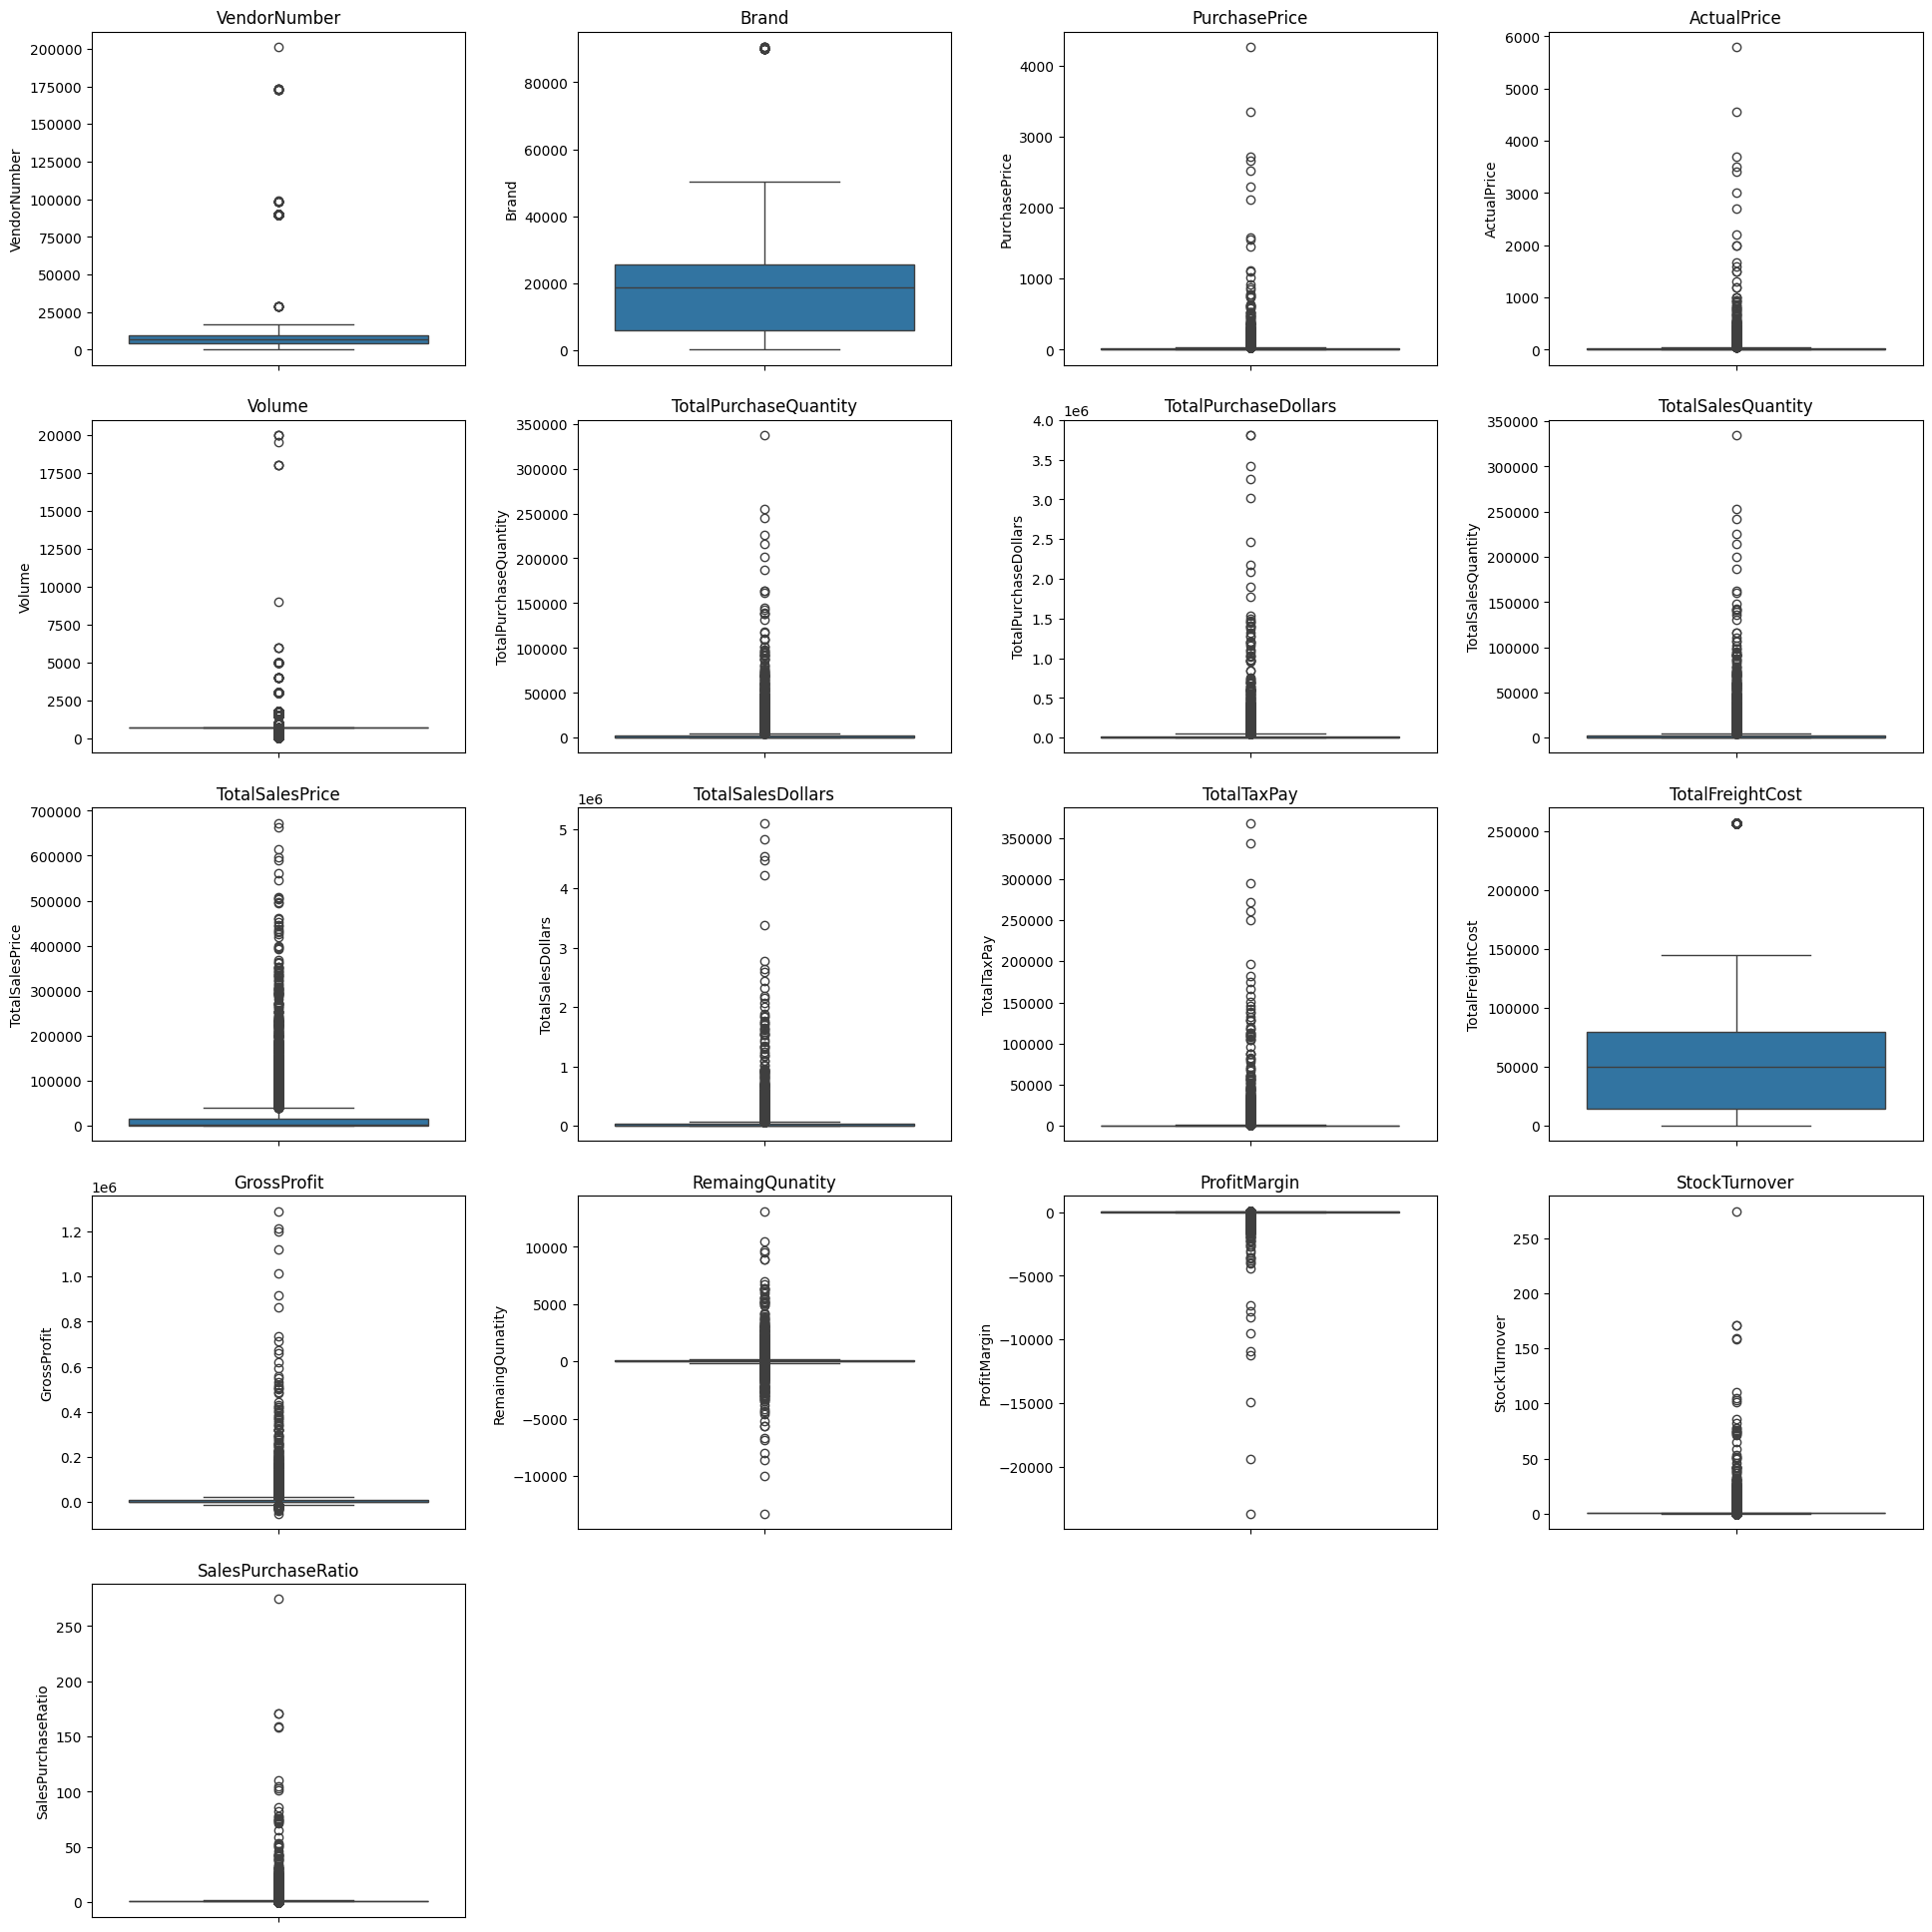

In [6]:
# Distribution plot for Numerical Columns

import math

# Get all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = len(numerical_cols)

# Define number of columns per row
cols_per_row = 4
rows = math.ceil(n_cols / cols_per_row)
# adjust figure size dynamically
plt.figure(figsize=(cols_per_row * 5, rows * 4))  

for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols_per_row, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    
# Add proper spacing between subplots
plt.tight_layout(pad=3.0, h_pad=2.0, w_pad=2.0)
plt.show()

In [ ]:
"""
Summary Statistics

1.Negative and Zero values 

    1.Gross Profit: Minimum value is –52,002.78, indicating losses due to high costs or heavy discounting below purchase price.
    2.Profit Margin: Minimum value is –0.00, showing cases where revenue is zero or lower than costs.
    
2.Outliers indicated by High Standard Deviation

    1.Purchase & Actual Price: Very high maximum values (4,264.70, 5,799.99) compared to the mean (23.41, 34.34) indicate premium or outlier products.
    2.Stock Turnover (High): Values up to 274.50 show some products sell extremely fast.
    3.Stock Turnover (Low): Values below 1 indicate slow-moving inventory that remains in stock longer.
    4.Turnover > 1: Sold quantity exceeds purchased quantity, likely fulfilled from older stock.
"""

#  2.Taking Columns Whose ProfitMargin, GrossProfit, TotalQuantity Are Than 0 For Better result.

In [7]:
df=pd.read_sql_query("""
                        select * from  vendor_sales_summary
                        where GrossProfit > 0
                        and ProfitMargin > 0
                        and TotalSalesQuantity > 0
                        """,conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalTaxPay,TotalFreightCost,GrossProfit,RemaingQunatity,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.2700,36.9900,1750.0000,145080,3811251.6000,142049,672819.3100,5101919.5100,260999.2000,68601.6800,1290667.9100,3031,25.2977,0.9791,0.9791
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.1900,28.9900,1750.0000,164038,3804041.2200,160247,561512.3700,4819073.4900,294438.6600,144929.2400,1015032.2700,3791,21.0628,0.9769,0.9769
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.2400,24.9900,1750.0000,187407,3418303.6800,187140,461140.1500,4538120.6000,343854.0700,123780.2200,1119816.9200,267,24.6758,0.9986,0.9986
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.1700,22.9900,1750.0000,201682,3261197.9400,200412,420050.0100,4475972.8800,368242.8000,257032.0700,1214774.9400,1270,27.1399,0.9937,0.9937
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.8900,29.9900,1750.0000,138109,3023206.0100,135838,545778.2800,4223107.6200,249587.8300,257032.0700,1199901.6100,2271,28.4128,0.9836,0.9836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,5612,MILTONS DISTRIBUTING CO,17675,Albero Sparkling Wh Organic,4.1400,6.2900,750.0000,1,4.1400,1,5.7900,5.7900,0.1100,9.4600,1.6500,0,28.4974,1.0000,1.0000
8560,9815,WINE GROUP INC,26950,Firefly Ridge Chard,3.9900,5.7900,750.0000,1,3.9900,1,5.7900,5.7900,0.1100,27100.4100,1.8000,0,31.0881,1.0000,1.0000
8561,8673,STE MICHELLE WINE ESTATES,13344,Columbia Crest Two Vines Rsl,3.5700,5.2900,1500.0000,1,3.5700,1,5.2900,5.2900,0.2200,15919.7000,1.7200,0,32.5142,1.0000,1.0000
8562,4425,MARTIGNETTI COMPANIES,27934,Terruzzi & Puthod Vernaccia,3.3700,4.9900,750.0000,1,3.3700,1,4.9900,4.9900,0.1100,144929.2400,1.6200,0,32.4649,1.0000,1.0000


In [ ]:
# Downloading Vendor Sales Summary Dataset for Power BI reports.

In [17]:

import pandas as pd
from zipfile import ZipFile
from IPython.display import FileLink

# ---- Read dataset ----

# ---- File names ----
csv_file = "Vendor_Sales_Summary.csv"

zip_file = "Vendor_sales_summary.zip"

# ---- Save filtered data to CSV ----
df.to_csv(csv_file, index=False, encoding="latin")

# ---- Create ZIP file ----
with ZipFile(zip_file, "w") as zipf:
    zipf.write(csv_file)

# ---- Generate download link ----
FileLink(zip_file)

C:\Users\asus\Desktop\Vendor_Analysis\Vendor_DataSales_Analysis\Vendor_Sales_summary_final_output\Vendor_sales_summary.zip

# 3. Top Ten Vendor Vrs Top Ten Product

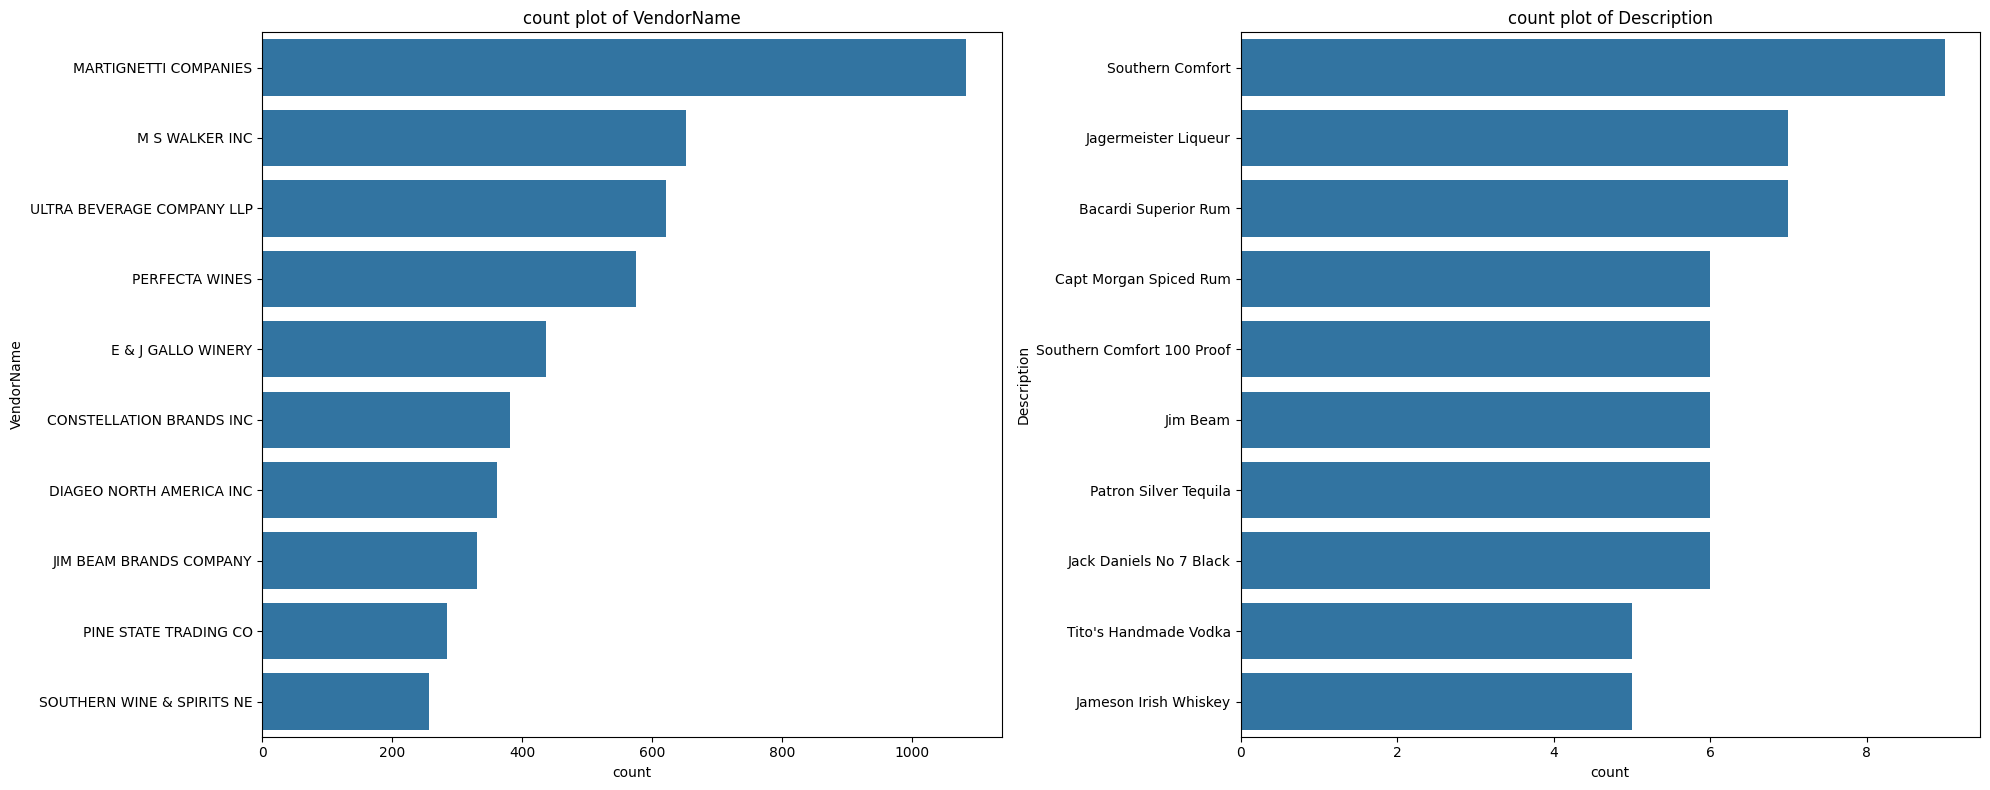

In [8]:
categoricals_cols=["VendorName","Description"]
plt.figure(figsize=(20,8))
for i , col in enumerate(categoricals_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

# 4.  Finding The Correlation Between Each Column Using Correlation And Heatmap?

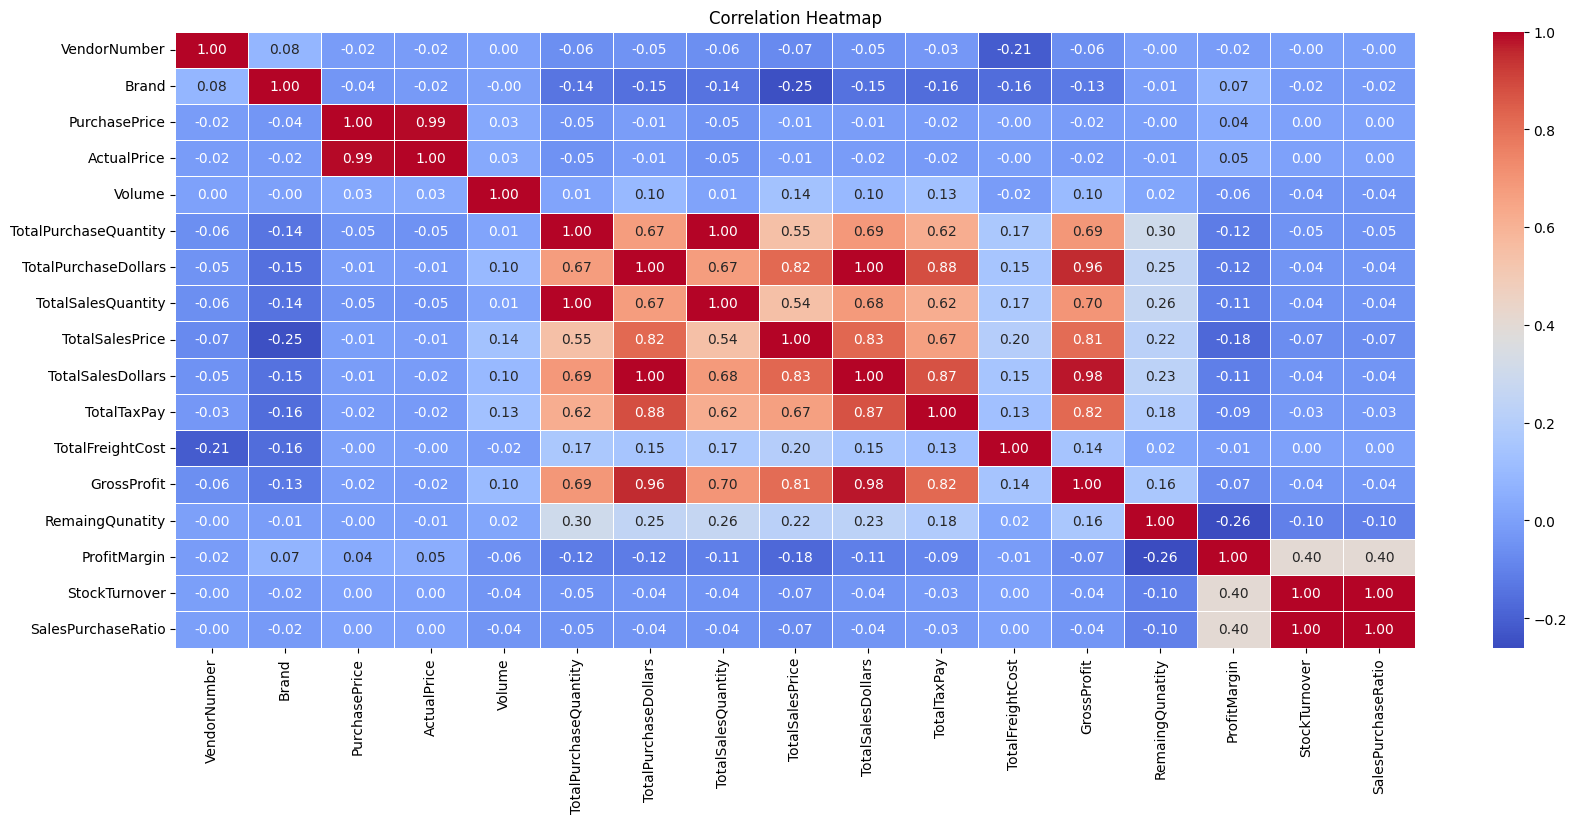

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(20,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=.5)
plt.title("Correlation Heatmap")
plt.show()

In [2]:
""" 
Correlation Insight
1. Sales, profit, and tax are strongly positively correlated, meaning higher sales directly lead to higher profit and tax.

2. Purchase quantity and sales quantity are almost perfectly correlated, showing healthy inventory flow with minimal unsold stock.

3. PurchasePrice and ActualPrice are perfectly correlated, so one of them is redundant for analysis/modeling.

4. GrossProfit depends more on TotalSalesDollars than on quantity, so revenue per unit matters more than volume.

5. VendorNumber and Brand have near-zero correlation with financial performance, so they don’t drive sales or profit directly.

6. If TotalSalesDollar increase it doesnot means that ProfitMargin(-0.12) also increase as shown in the heatmap

"""
 
 

# 5. Most selling Product According Total Sales Dollar and Totlal Profit Margin

In [10]:
Most_Selling_Product=(
                       df.groupby("Description")
                         .agg(
                             TotalSalesDollar_On_Each_Description=("TotalSalesDollars","sum"),
                             TotalProfitMargin_On_Each_Description=("ProfitMargin","mean")
                         )
                          .reset_index()
                          .round(2)
) 
Most_Selling_Product


,Description,TotalSalesDollar_On_Each_Description,TotalProfitMargin_On_Each_Description
0,(RI) 1,21519.0900,18.0600
1,.nparalleled Svgn Blanc,1094.6300,29.9800
2,10 Span Cab Svgn CC,2703.8900,20.9400
3,10 Span Chard CC,3325.5600,27.8100
4,10 Span Pnt Gris Monterey Cy,2082.2200,32.2300
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.0300,29.5300
7703,Zuccardi Q Malbec,1639.1800,23.9800
7704,Zum Rsl,10857.3400,32.6800
7705,Zwack Liqueur,227.8800,16.6500


In [11]:
Most_Selling_Product["Description"].nunique()

7707

# Which low-sales but high–profit margin products should be prioritized for increased marketing and sales efforts?

In [11]:
Low_Sales_Thrashhold=float(Most_Selling_Product["TotalSalesDollar_On_Each_Description"].quantile(0.15))


In [107]:
Low_Sales_Thrashhold=round(Low_Sales_Thrashhold,2)
Low_Sales_Thrashhold

560.3

In [13]:
High_Margin_Thrashhold=float(Most_Selling_Product["TotalProfitMargin_On_Each_Description"].quantile(0.85))

In [108]:
High_Margin_Thrashhold=round(High_Margin_Thrashhold,2)
High_Margin_Thrashhold

64.97

In [109]:
Targeted_Product=Most_Selling_Product.query("TotalSalesDollar_On_Each_Description <=560.299 & TotalProfitMargin_On_Each_Description>=64.968")
Targeted_Product



,Description,TotalSalesDollar_On_Each_Description,TotalProfitMargin_On_Each_Description
6,12 Days of Pearls Gift Set,309.6900,97.6800
45,4 Orange Vodka,483.7800,85.9000
57,A Bichot Clos Marechaudes,539.9400,67.7400
59,A Bichot Merc Champs M,515.8800,94.5500
96,Absolut Orient Apple Vodka,119.9400,87.6500
...,...,...,...
7588,Woodford Rsv Master Coll Pnt,489.9500,73.7600
7663,Zardetto Pros di Coneg Brut,345.8600,88.7600
7677,Zerran Tinto Montsant,139.9100,77.5900
7686,Zhenka Vodka 80 Proof,240.3900,87.3000


In [16]:
print(type(Targeted_Product))

<class 'pandas.core.frame.DataFrame'>


In [17]:
"""
OutPut:

 198 Product Having low Sell But Hight Profit Margin
 
 """

'\nOutPut:\n\n 198 Product Having low Sell But Hight Profit Margin\n\n '

In [16]:
# Target Product Advertisement And Increase Their selling In The Market

Targeted_Product_sorted = Targeted_Product.sort_values(
    by="TotalSalesDollar_On_Each_Description", 
    ascending=True
)

Targeted_Product_sorted

,Description,TotalSalesDollar_On_Each_Description,TotalProfitMargin_On_Each_Description
6199,Santa Rita Organic Svgn Bl,9.9900,66.4700
2369,Debauchery Pnt Nr,11.5800,65.9800
2070,Concannon Glen Ellen Wh Zin,15.9500,83.4500
2188,Crown Royal Apple,27.8600,89.8100
6237,Sauza Sprklg Wild Berry Marg,27.9600,82.1500
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.6800,76.7500
2271,Dad's Hat Rye Whiskey,538.8900,81.8500
57,A Bichot Clos Marechaudes,539.9400,67.7400
6245,Sbragia Home Ranch Merlot,549.7500,66.4400


In [110]:
Most_Selling_Product = Most_Selling_Product.query("TotalSalesDollar_On_Each_Description < 10000") 
#Just For Better Visualization Of Targated Product taken TotalSalesDollar_On_Each_Description < 10000.


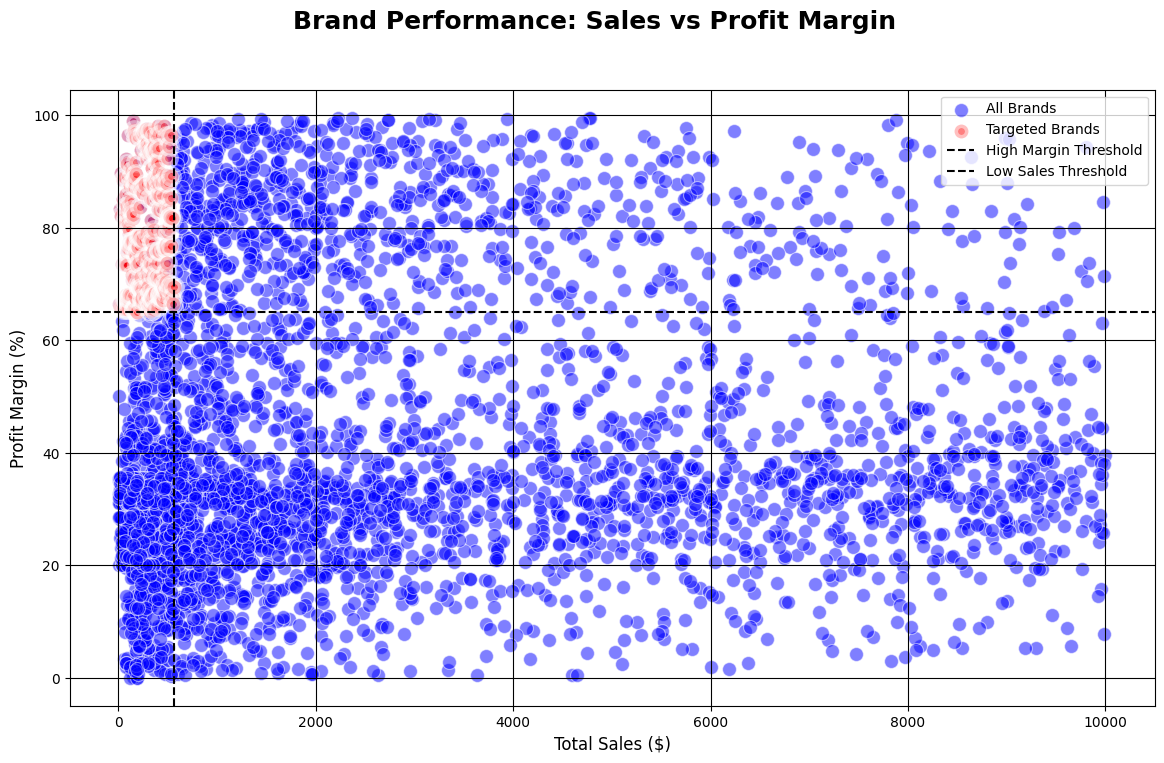

In [105]:

plt.figure(figsize=(14,8))
plt.suptitle(
    "Brand Performance: Sales vs Profit Margin",
    fontsize=18,
    fontweight='bold',
    y=0.98
)
sns.scatterplot(
    data=Most_Selling_Product,
    x="TotalSalesDollar_On_Each_Description",
    y="TotalProfitMargin_On_Each_Description",
    label="All Brands",
    color="blue",
    alpha=0.5,
    s=100
             
)


sns.scatterplot(
    data=Targeted_Product_sorted,
    x="TotalSalesDollar_On_Each_Description",
    y="TotalProfitMargin_On_Each_Description",
    color="red",
    label="Targeted Brands",        
    linewidth=5,
    alpha=0.5,
    s=100
)

# Threshold lines
plt.axhline(High_Margin_Thrashhold, linestyle="--", color="black", label="High Margin Threshold")
plt.axvline(Low_Sales_Thrashhold, linestyle="--", color="black", label="Low Sales Threshold")

# Labels
plt.xlabel("Total Sales ($)", fontsize=12)
plt.ylabel("Profit Margin (%)", fontsize=12)

# Legend and grid
plt.legend()
plt.grid(linewidth=0.8,color="black")
plt.show()



# 7. Which Vendors And Brands Demonstrate The Highest Sales Performance?

In [21]:
# Top ten highest vendor on the basis of TotalsalesDollars
Top_Ten_Hightes_Sales_Vendors=(
                       df.groupby(["VendorNumber","VendorName"])
                         .agg(
                             Highest_Sellers_Vendor_Amount=("TotalSalesDollars","sum")
                         )
                         .reset_index()
                         .round(2)
                         .sort_values(by="Highest_Sellers_Vendor_Amount",ascending=False)
                         .head(10)
)
print("Top_Ten_Hightes_Sales_Vendors:\n",Top_Ten_Hightes_Sales_Vendors)




Top_Ten_Hightes_Sales_Vendors:
     VendorNumber                  VendorName  Highest_Sellers_Vendor_Amount
38          3960    DIAGEO NORTH AMERICA INC                  67990099.4200
40          4425       MARTIGNETTI COMPANIES                  39330359.3600
94         17035           PERNOD RICARD USA                  32063196.1900
90         12546     JIM BEAM BRANDS COMPANY                  31423020.4600
5            480             BACARDI USA INC                  24854817.1400
14          1392    CONSTELLATION BRANDS INC                  24218745.6500
33          3252          E & J GALLO WINERY                  18399899.4600
10          1128           BROWN-FORMAN CORP                  18247230.6500
75          9165  ULTRA BEVERAGE COMPANY LLP                  16502544.3100
78          9552              M S WALKER INC                  14706458.5100


In [22]:
# Top ten highest brand on the basis of TotalSalesDollars.
Top_Ten_Highest_Sales_Brand=(
                           df.groupby("Description")
                             .agg(
                                  Highest_Sales_Brands_Amount=("TotalSalesDollars","sum")
                                  )
                                 .round(2)
                                 .reset_index()
                                 .sort_values(by="Highest_Sales_Brands_Amount",ascending=False)
                                 .head(10)
)
print("Top_Ten_Highest_Sales_Brand:\n",Top_Ten_Highest_Sales_Brand)

Top_Ten_Highest_Sales_Brand:
                   Description  Highest_Sales_Brands_Amount
3771  Jack Daniels No 7 Black                 7964746.7600
7114    Tito's Handmade Vodka                 7399657.5800
3402         Grey Goose Vodka                 7209608.0600
1272   Capt Morgan Spiced Rum                 6356320.6200
86           Absolut 80 Proof                 6244752.0300
3850    Jameson Irish Whiskey                 5715759.6900
4101          Ketel One Vodka                 5070083.5600
478       Baileys Irish Cream                 4150122.0700
4019                   Kahlua                 3604858.6600
6846                Tanqueray                 3456697.9000


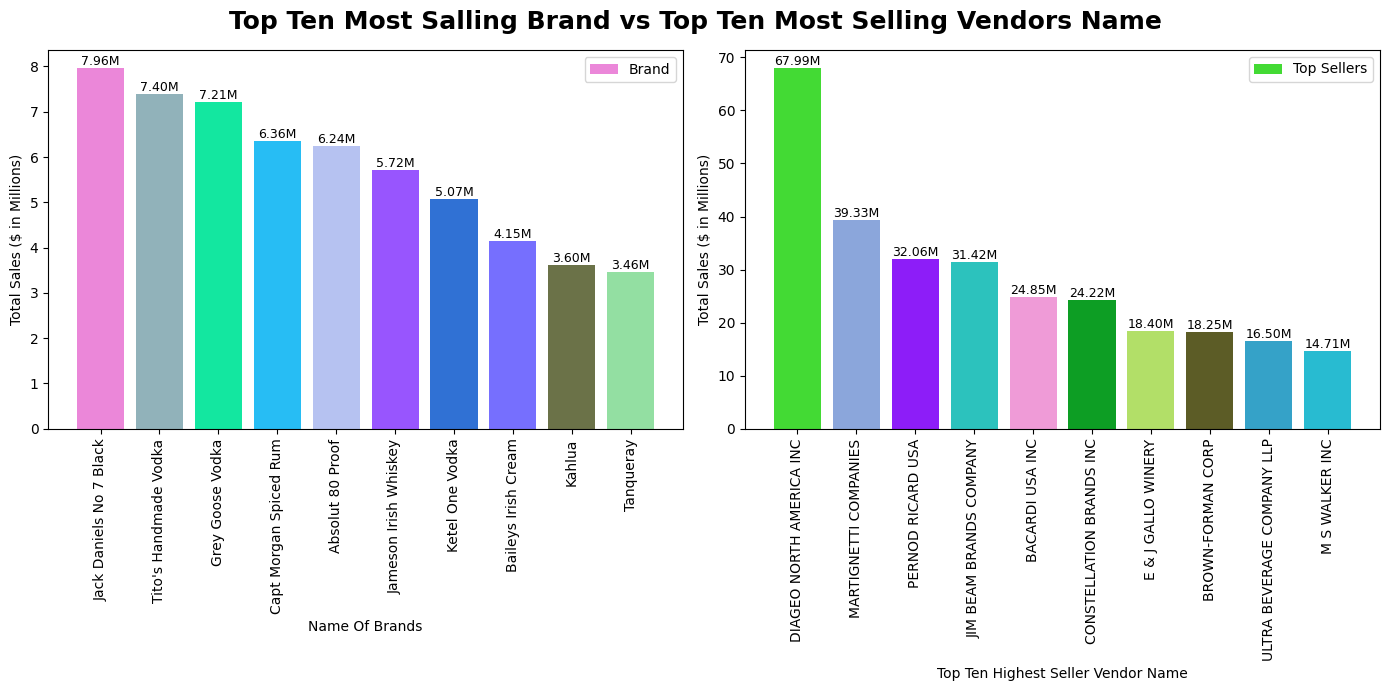

In [104]:
x1 = Top_Ten_Highest_Sales_Brand["Description"]
y1 = Top_Ten_Highest_Sales_Brand["Highest_Sales_Brands_Amount"] / 1_000_000

plt.figure(figsize=(14,7))
plt.suptitle(
    "Top Ten Most Salling Brand vs Top Ten Most Selling Vendors Name",
    fontsize=18,
    fontweight='bold',
    y=0.98
)

plt.subplot(1,2,1)
colors1 = np.random.rand(len(x1), 3) 
bars1 = plt.bar(x1, y1, color=colors1, label="Brand")
plt.xlabel("Name Of Brands")
plt.ylabel("Total Sales ($ in Millions)")
plt.xticks(rotation=90)
plt.legend()

# 🔹 Add labels on top of bars (Millions)
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}M',
             ha='center', va='bottom', fontsize=9)


x2 = Top_Ten_Hightes_Sales_Vendors["VendorName"]
y2 = Top_Ten_Hightes_Sales_Vendors["Highest_Sellers_Vendor_Amount"] / 1_000_000

plt.subplot(1,2,2)
colors2 = np.random.rand(len(x2), 3) 
bars2 = plt.bar(x2, y2, color=colors2, label="Top Sellers")
plt.xlabel("Top Ten Highest Seller Vendor Name")
plt.ylabel("Total Sales ($ in Millions)")
plt.xticks(rotation=90)
plt.legend()

# 🔹 Add labels on top of bars (Millions)
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}M',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# 8. Which Vendors Contribute The Most To The Total Purchase Dollars And Selling Dollars?

In [111]:
Top_Ten_Hightes_Sales_Vendors=(
                       df.groupby(["VendorNumber","VendorName"])
                         .agg(
                             Highest_Sellers_Vendor_Amount=("TotalSalesDollars","sum")
                         )
                         .reset_index()
                         .round(2)
                         .sort_values(by="Highest_Sellers_Vendor_Amount",ascending=False)
                         .head(10)
)
print("Top_Ten_Hightes_Sales_Vendors:\n",Top_Ten_Hightes_Sales_Vendors)


Top_Ten_Hightes_Sales_Vendors:
     VendorNumber                  VendorName  Highest_Sellers_Vendor_Amount
38          3960    DIAGEO NORTH AMERICA INC                  67990099.4200
40          4425       MARTIGNETTI COMPANIES                  39330359.3600
94         17035           PERNOD RICARD USA                  32063196.1900
90         12546     JIM BEAM BRANDS COMPANY                  31423020.4600
5            480             BACARDI USA INC                  24854817.1400
14          1392    CONSTELLATION BRANDS INC                  24218745.6500
33          3252          E & J GALLO WINERY                  18399899.4600
10          1128           BROWN-FORMAN CORP                  18247230.6500
75          9165  ULTRA BEVERAGE COMPANY LLP                  16502544.3100
78          9552              M S WALKER INC                  14706458.5100


In [113]:
Top_Ten_Highest_Purchase_Vendor = (
                            df.groupby(["VendorNumber","VendorName"])
                               .agg(
                                   Most_Purchasing_Vendor_Amount=("TotalPurchaseDollars","sum")
                               )
                                  .round(2)
                                  .reset_index()
                                  .sort_values(by="Most_Purchasing_Vendor_Amount",ascending=False)
                                  .head(10)
    
)
print("Most_Purchase_Vendor:\n",Top_Ten_Highest_Purchase_Vendor)

Most_Purchase_Vendor:
     VendorNumber                  VendorName  Most_Purchasing_Vendor_Amount
38          3960    DIAGEO NORTH AMERICA INC                  50097226.1600
40          4425       MARTIGNETTI COMPANIES                  25502095.8300
94         17035           PERNOD RICARD USA                  23851164.1700
90         12546     JIM BEAM BRANDS COMPANY                  23494304.3200
5            480             BACARDI USA INC                  17432020.2600
14          1392    CONSTELLATION BRANDS INC                  15273708.0800
10          1128           BROWN-FORMAN CORP                  13238939.1800
33          3252          E & J GALLO WINERY                  12068539.2200
75          9165  ULTRA BEVERAGE COMPANY LLP                  11167081.6100
78          9552              M S WALKER INC                   9764312.6000


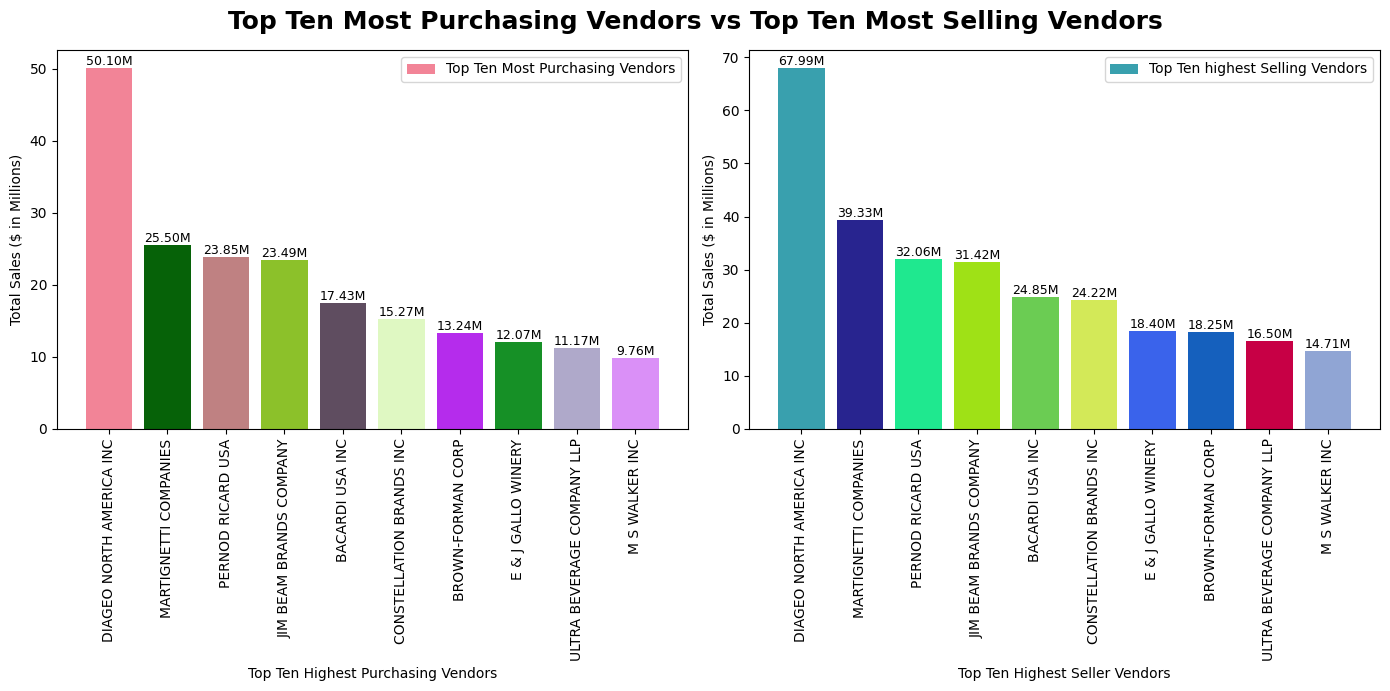

In [114]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14,7))

# 🔹 Main Title (Centered & Bold)
plt.suptitle(
    "Top Ten Most Purchasing Vendors vs Top Ten Most Selling Vendors",
    fontsize=18,
    fontweight='bold',
    y=0.98
)

# ===== Purchasing Vendors =====
x1 = Top_Ten_Highest_Purchase_Vendor["VendorName"]
y1 = Top_Ten_Highest_Purchase_Vendor["Most_Purchasing_Vendor_Amount"] / 1_000_000

plt.subplot(1,2,1)
colors1 = np.random.rand(len(x1), 3) 
bars1 = plt.bar(x1, y1, color=colors1, label="Top Ten Most Purchasing Vendors")
plt.xlabel("Top Ten Highest Purchasing Vendors")
plt.ylabel("Total Sales ($ in Millions)")
plt.xticks(rotation=90)
plt.legend()

# 🔹 Labels above bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}M',
             ha='center', va='bottom', fontsize=9)


# ===== Selling Vendors =====
x2 = Top_Ten_Hightes_Sales_Vendors["VendorName"]
y2 = Top_Ten_Hightes_Sales_Vendors["Highest_Sellers_Vendor_Amount"] / 1_000_000

plt.subplot(1,2,2)
colors2 = np.random.rand(len(x2), 3) 
bars2 = plt.bar(x2, y2, color=colors2, label="Top Ten highest Selling Vendors")
plt.xlabel("Top Ten Highest Seller Vendors")
plt.ylabel("Total Sales ($ in Millions)")
plt.xticks(rotation=90)
plt.legend()

# 🔹 Labels above bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}M',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [26]:
"""
 OutPut:
 
  1.The one who purchases the most is also the one who sells the most.
  2.In other words, the vendor with the highest purchases also has the highest sales, as shown in the graph above.
 
"""

'\n OutPut:\n\n  1.The one who purchases the most is also the one who sells the most.\n  2.In other words, the vendor with the highest purchases also has the highest sales, as shown in the graph above.\n\n'

In [30]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalTaxPay', 'TotalFreightCost', 'GrossProfit',
       'RemaingQunatity', 'ProfitMargin', 'StockTurnover',
       'SalesPurchaseRatio'],
      dtype='object')

# 9. Most Purchasing vendor Contribution In Total Purchasing Vrs Most Selling Vendor Contribution In Total Sales On The basis Of         TotalPurchaseDollars,GrossProfit,TotalSalesDollars .

In [31]:
Selling_Contribution_By_Each_Vendor=(
                                           df.groupby(["VendorNumber","VendorName"])
                                             .agg({
                                                 "TotalPurchaseDollars":"sum",
                                                 "GrossProfit":"sum",
                                                 "TotalSalesDollars":"sum"
                                             })
)
Selling_Contribution_By_Each_Vendor

,,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
VendorNumber,VendorName,,,
2,"IRA GOLDMAN AND WILLIAMS, LLP",190.8800,474.9400,665.8200
60,ADAMBA IMPORTS INTL INC,446.1600,258.3700,704.5300
105,ALTAMAR BRANDS LLC,11706.2000,4000.6100,15706.8100
200,AMERICAN SPIRITS EXCHANGE,934.0800,577.0800,1511.1600
388,ATLANTIC IMPORTING COMPANY,41116.3200,18156.4300,59272.7500
...,...,...,...,...
90058,ZORVINO VINEYARDS,86122.7100,38066.8800,124189.5900
98450,Serralles Usa LLC,135637.1500,58296.0700,193933.2200
172662,SWEETWATER FARM,19716.4100,2095.6000,21812.0100


In [32]:
print(type(Selling_Contribution_By_Each_Vendor))

<class 'pandas.core.frame.DataFrame'>


In [33]:
Selling_Contribution_By_Each_Vendor.columns

Index(['TotalPurchaseDollars', 'GrossProfit', 'TotalSalesDollars'], dtype='object')

In [34]:
Selling_Contribution_By_Each_Vendor["Top_Vendor_Selling_Contribution_In_Per"]=Selling_Contribution_By_Each_Vendor["TotalSalesDollars"]/Selling_Contribution_By_Each_Vendor["TotalSalesDollars"].sum()
Selling_Contribution_By_Each_Vendor.sort_values(by="Top_Vendor_Selling_Contribution_In_Per",ascending=False,inplace=True)



In [35]:
Top_Ten_Most_Selling_Vendor=(
                                       Selling_Contribution_By_Each_Vendor[["Top_Vendor_Selling_Contribution_In_Per"]]
                                      .round(2)
                                      .reset_index()
                                      .sort_values(by="Top_Vendor_Selling_Contribution_In_Per",ascending=False)
                                      .head(10)
                                    )
Top_Ten_Most_Selling_Vendor



,VendorNumber,VendorName,Top_Vendor_Selling_Contribution_In_Per
0,3960,DIAGEO NORTH AMERICA INC,0.1500
1,4425,MARTIGNETTI COMPANIES,0.0900
2,17035,PERNOD RICARD USA,0.0700
3,12546,JIM BEAM BRANDS COMPANY,0.0700
4,480,BACARDI USA INC,0.0600
5,1392,CONSTELLATION BRANDS INC,0.0500
6,3252,E & J GALLO WINERY,0.0400
7,1128,BROWN-FORMAN CORP,0.0400
8,9165,ULTRA BEVERAGE COMPANY LLP,0.0400
9,9552,M S WALKER INC,0.0300


In [91]:
Percentage_Of_Top_Ten_Vendor=(Top_Ten_Most_Selling_Vendor["Top_Vendor_Selling_Contribution_In_Per"].sum())*100
Percentage_Of_Top_Ten_Vendor=round(Percentage_Of_Top_Ten_Vendor,2)
Percentage_Of_Top_Ten_Vendor

np.float64(64.0)

In [92]:
Remaining_Contribution_Of_Ohters_Vendor=round((100-Percentage_Of_Top_Ten_Vendor),2)
Remaining_Contribution_Of_Ohters_Vendor

np.float64(36.0)

In [42]:
Purcahsing_Contribution_From_Each_Vendor=df.groupby(["VendorNumber","VendorName"]).agg({
                                                 "TotalPurchaseDollars":"sum",
                                                "GrossProfit":"sum",
                                                 "TotalSalesDollars":"sum"
})

Purcahsing_Contribution_From_Each_Vendor


,,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
VendorNumber,VendorName,,,
2,"IRA GOLDMAN AND WILLIAMS, LLP",190.8800,474.9400,665.8200
60,ADAMBA IMPORTS INTL INC,446.1600,258.3700,704.5300
105,ALTAMAR BRANDS LLC,11706.2000,4000.6100,15706.8100
200,AMERICAN SPIRITS EXCHANGE,934.0800,577.0800,1511.1600
388,ATLANTIC IMPORTING COMPANY,41116.3200,18156.4300,59272.7500
...,...,...,...,...
90058,ZORVINO VINEYARDS,86122.7100,38066.8800,124189.5900
98450,Serralles Usa LLC,135637.1500,58296.0700,193933.2200
172662,SWEETWATER FARM,19716.4100,2095.6000,21812.0100


In [44]:
Purcahsing_Contribution_From_Each_Vendor["Top_Most_Purchasing_Vendor_In_Per"]=Purcahsing_Contribution_From_Each_Vendor["TotalPurchaseDollars"]/Purcahsing_Contribution_From_Each_Vendor["TotalPurchaseDollars"].sum()
Purcahsing_Contribution_From_Each_Vendor

,,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Top_Most_Purchasing_Vendor_In_Per
VendorNumber,VendorName,,,,
2,"IRA GOLDMAN AND WILLIAMS, LLP",190.8800,474.9400,665.8200,0.0000
60,ADAMBA IMPORTS INTL INC,446.1600,258.3700,704.5300,0.0000
105,ALTAMAR BRANDS LLC,11706.2000,4000.6100,15706.8100,0.0000
200,AMERICAN SPIRITS EXCHANGE,934.0800,577.0800,1511.1600,0.0000
388,ATLANTIC IMPORTING COMPANY,41116.3200,18156.4300,59272.7500,0.0001
...,...,...,...,...,...
90058,ZORVINO VINEYARDS,86122.7100,38066.8800,124189.5900,0.0003
98450,Serralles Usa LLC,135637.1500,58296.0700,193933.2200,0.0004
172662,SWEETWATER FARM,19716.4100,2095.6000,21812.0100,0.0001


In [40]:
print(type(Purcahsing_Contribution_From_Each_Vendor))

<class 'pandas.core.frame.DataFrame'>


In [40]:
Purcahsing_Contribution_From_Each_Vendor.columns

Index(['TotalPurchaseDollars', 'GrossProfit', 'TotalSalesDollars',
       'Top_Most_Purchasing_Vendor_In_Per'],
      dtype='object')

In [46]:
Top_Ten_Most_Purchasing_Vendor=(
                                       Purcahsing_Contribution_From_Each_Vendor[["Top_Most_Purchasing_Vendor_In_Per"]]
                                      .round(2)
                                      .reset_index()
                                      .sort_values(by="Top_Most_Purchasing_Vendor_In_Per",ascending=False)
                                      .head(10)
                                    )
Top_Ten_Most_Purchasing_Vendor

,VendorNumber,VendorName,Top_Most_Purchasing_Vendor_In_Per
38,3960,DIAGEO NORTH AMERICA INC,0.1600
40,4425,MARTIGNETTI COMPANIES,0.0800
94,17035,PERNOD RICARD USA,0.0800
90,12546,JIM BEAM BRANDS COMPANY,0.0800
5,480,BACARDI USA INC,0.0600
14,1392,CONSTELLATION BRANDS INC,0.0500
33,3252,E & J GALLO WINERY,0.0400
10,1128,BROWN-FORMAN CORP,0.0400
75,9165,ULTRA BEVERAGE COMPANY LLP,0.0400
65,8112,MOET HENNESSY USA INC,0.0300


In [93]:
Percentage_Of_Top_Ten_Vendor=(Top_Ten_Most_Purchasing_Vendor["Top_Most_Purchasing_Vendor_In_Per"].sum())*100
Percentage_Of_Top_Ten_Vendor=round(Percentage_Of_Top_Ten_Vendor,2)
Percentage_Of_Top_Ten_Vendor

np.float64(66.0)

In [94]:
Ohters_Vendor_Contribution=round((100-Percentage_Of_Top_Ten_Vendor),2)
Ohters_Vendor_Contribution

np.float64(34.0)

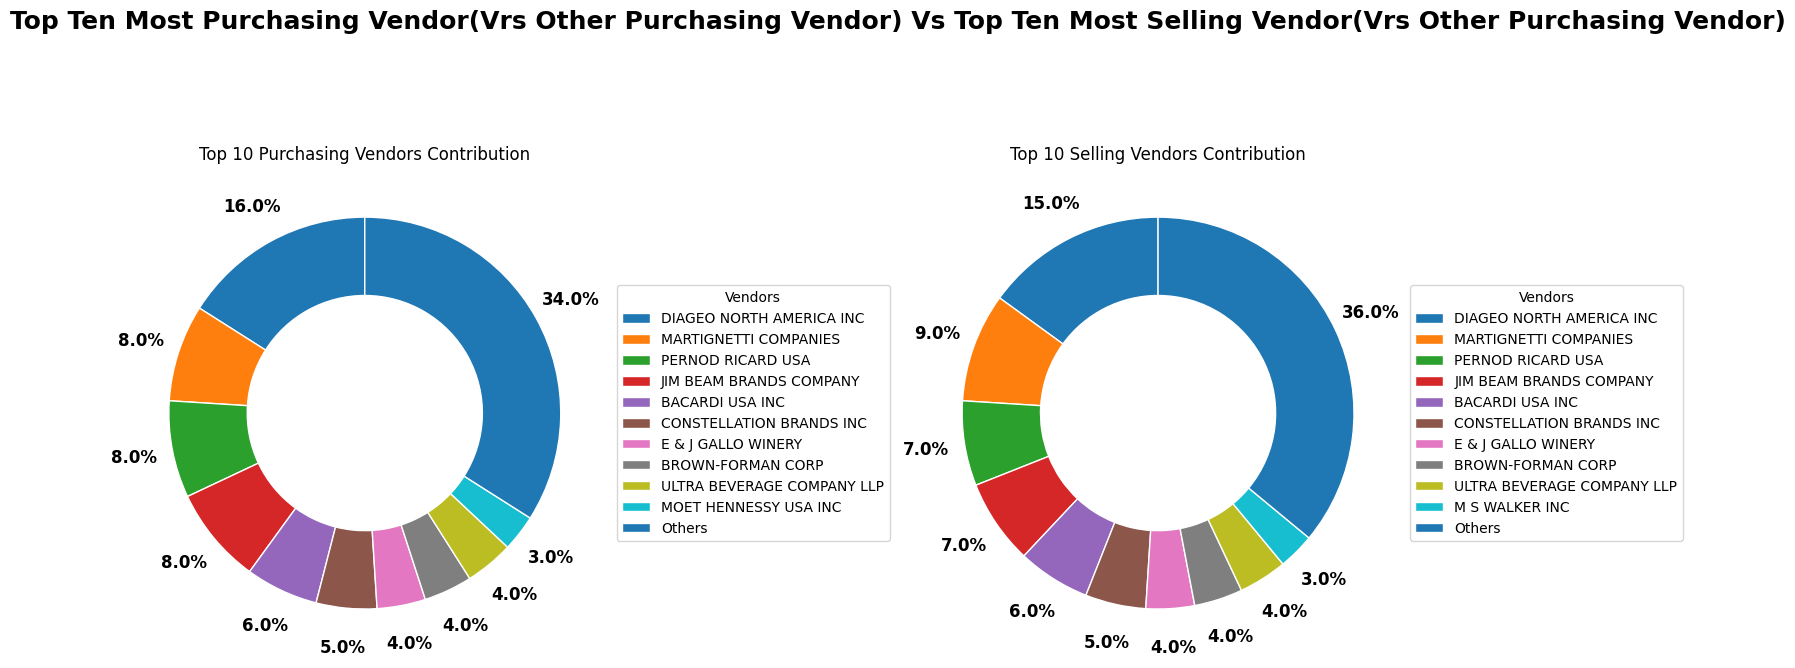

In [117]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(16, 8))

# 🔹 Main Title (Centered & Bold)
plt.suptitle(
    "Top Ten Most Purchasing Vendor(Vrs Other Purchasing Vendor) Vs Top Ten Most Selling Vendor(Vrs Other Purchasing Vendor)",
    fontsize=18,
    fontweight='bold',
    y=0.98
)

# 🔹 Purchasing Donut
plt.subplot(1, 2, 1)
wedges1, _ = plt.pie(
    purchase_contribution1,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

plt.title("Top 10 Purchasing Vendors Contribution")

for i, w in enumerate(wedges1):
    angle = (w.theta2 + w.theta1) / 2
    x = 1.2 * np.cos(np.deg2rad(angle))
    y = 1.2 * np.sin(np.deg2rad(angle))
    plt.text(x, y,
             f"{purchase_contribution1[i]*100:.1f}%",
             ha='center', va='center',
             fontsize=12, fontweight='bold')

plt.legend(wedges1, vendors1, title="Vendors",
           loc="center left", bbox_to_anchor=(1, 0.5))


# 🔹 Selling Donut
plt.subplot(1, 2, 2)
wedges2, _ = plt.pie(
    selling_contribution2,
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='white')
)

plt.title("Top 10 Selling Vendors Contribution")

for i, w in enumerate(wedges2):
    angle = (w.theta2 + w.theta1) / 2
    x = 1.2 * np.cos(np.deg2rad(angle))
    y = 1.2 * np.sin(np.deg2rad(angle))
    plt.text(x, y,
             f"{selling_contribution2[i]*100:.1f}%",
             ha='center', va='center',
             fontsize=12, fontweight='bold')

plt.legend(wedges2, vendors2, title="Vendors",
           loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [ ]:
"""
Output

  1.Vendors who buy more products also sell more products.
  2.This shows that higher purchasing usually leads to higher sales and revenue.
  3.Almost all of the top ten buyers are also in the top ten sellers.
  4.The top ten vendors make about 66% of total purchases and 64% of total sales, so a few vendors control most of the business.

"""



# 10. Does Purchasing In Bulk Redusce The Unit Price And What Is The Optimal Puchase Volume For Csot Saving?


In [46]:
df["UnitPurchasePrice"]=df["TotalPurchaseDollars"]/df["TotalPurchaseQuantity"]

In [47]:
df["OrderSize"]=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","large"])

In [48]:
df.groupby("OrderSize")[["UnitPurchasePrice"]].mean()

C:\Users\asus\AppData\Local\Temp\ipykernel_6704\2504227169.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("OrderSize")[["UnitPurchasePrice"]].mean()


,UnitPurchasePrice
OrderSize,
Small,39.0682
Medium,15.4864
large,10.7776


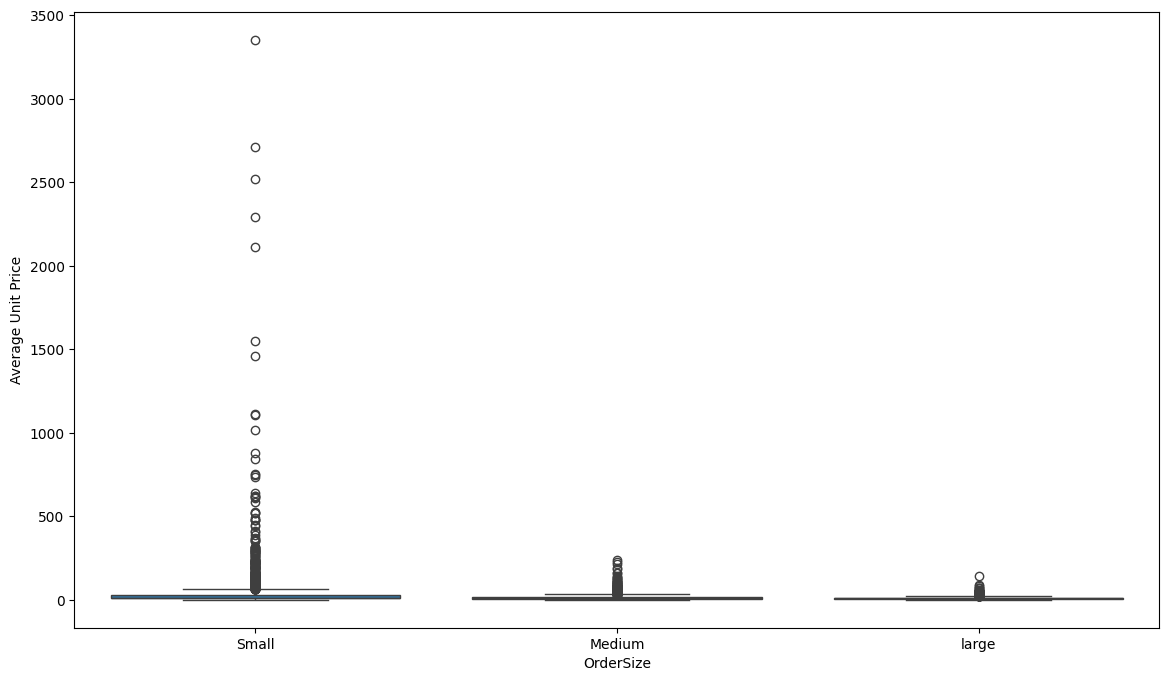

In [49]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Price")
plt.show()

In [ ]:
"""
OutCome from This Above Graph

 1.Vendor buyingin bulk(large order size) get the lowest unit price (10.78 dollars per unit) , meaning higher margin if they can manage 
   inventory efficently
 2.The Price difference between Small and LArge orders is substantial(~72 reduxtion in unit cost)
 3.This suggest that bulk princing stategies successfully encourage vendors to purchase in large in larger volumes,leading to higher overall 
   sales despite lower per unit price 
  
"""

# 11. Which Inventory Have Low Turnover, Indicating Excess Stock And Slow-Moving Product?

In [40]:
Vendor_TrunOver_According_VendorName=(
                            df.query("StockTurnover < 1")
                             .groupby(["VendorName"])
                               .agg(
                                   Average_TrunOver_Of_Each_Vendor=("StockTurnover","mean")
                               )
                               .round(2)
                               .reset_index()
                               .sort_values(by="Average_TrunOver_Of_Each_Vendor",ascending=True)
                               .head(10)
                                
)
print("Vendor_TrunOver_According_VendorName:\n",Vendor_TrunOver_According_VendorName)

Vendor_TrunOver_According_VendorName:
                       VendorName  Average_TrunOver_Of_Each_Vendor
0           ALISA CARR BEVERAGES                           0.6200
36   HIGHLAND WINE MERCHANTS LLC                           0.7100
60       PARK STREET IMPORTS LLC                           0.7500
19                   Circa Wines                           0.7600
26             Dunn Wine Brokers                           0.7700
15           CENTEUR IMPORTS LLC                           0.7700
78   SMOKY QUARTZ DISTILLERY LLC                           0.7800
90           TAMWORTH DISTILLING                           0.8000
91        THE IMPORTED GRAPE LLC                           0.8100
101      WALPOLE MTN VIEW WINERY                           0.8200


In [ ]:
"""
Output:
    1.These vendors have an average stock turnover of less than 1, which means their products are selling slowly.
"""

# 12. How Much Capital Is Locked In Unsold Inventory Per Vendor, And Which Vendor Contributes The Most To It?

In [52]:
df["UnSoldQuantity"] = df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]
df["UnSoldCapital"] = df["UnSoldQuantity"] * df["PurchasePrice"]
print("UnSoldCapital:",round(df["UnSoldCapital"].sum(),2))

UnSoldCapital: 2708177.22


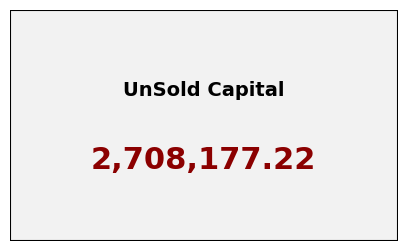

In [55]:
import matplotlib.pyplot as plt

unsold_capital = round(df["UnSoldCapital"].sum(), 2)

plt.figure(figsize=(5,3))
plt.axis('off')  # Hide axes

# Card background
plt.gca().add_patch(
    plt.Rectangle((0, 0), 1, 1, transform=plt.gca().transAxes,
                  facecolor="#f2f2f2", edgecolor="black", linewidth=1.5)
)

# Title
plt.text(0.5, 0.65, "UnSold Capital",
         ha='center', va='center', fontsize=14, fontweight='bold')

# Value
plt.text(0.5, 0.35, f"{unsold_capital:,.2f}",
         ha='center', va='center', fontsize=22, fontweight='bold', color='darkred')

plt.show()


In [54]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalTaxPay', 'TotalFreightCost', 'GrossProfit',
       'RemaingQunatity', 'ProfitMargin', 'StockTurnover',
       'SalesPurchaseRatio', 'UnitPurchasePrice', 'OrderSize',
       'UnSoldQuantity', 'UnSoldCapital'],
      dtype='object')

In [56]:
Top_Ten_unsold_inventory_Unsoldcapital=(
                                       df.groupby(["VendorName","VendorNumber"])
                                         .agg(
                                             Top_ten_vendor_unsold_capital=("UnSoldCapital","sum")
                                         )
                                         .round(4)
                                         .reset_index()
                                         .sort_values(by="Top_ten_vendor_unsold_capital",ascending=False)
                                         .head(10)
)
print("Top_Ten_unsold_inventory_Unsoldcapital:\n",Top_Ten_unsold_inventory_Unsoldcapital)

Top_Ten_unsold_inventory_Unsoldcapital:
                    VendorName  VendorNumber  Top_ten_vendor_unsold_capital
25   DIAGEO NORTH AMERICA INC          3960                    722209.0500
46    JIM BEAM BRANDS COMPANY         12546                    554665.6300
68          PERNOD RICARD USA         17035                    470625.6100
116  WILLIAM GRANT & SONS INC          3664                    401960.8300
30         E & J GALLO WINERY          3252                    228282.6100
79             SAZERAC CO INC          8004                    198436.4100
11          BROWN-FORMAN CORP          1128                    177733.7400
20   CONSTELLATION BRANDS INC          1392                    133617.6200
61      MOET HENNESSY USA INC          8112                    126477.7000
77     REMY COINTREAU USA INC          7239                    118598.1500


In [57]:
Total_Capital=Top_Ten_unsold_inventory_Unsoldcapital["Top_ten_vendor_unsold_capital"].sum()
Total_Capital

np.float64(3132607.35)

# 13. # What is the 95% confidence for profit margin of top-performing and low-performing vendors.

In [4]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesPrice',
       'TotalSalesDollars', 'TotalTaxPay', 'TotalFreightCost', 'GrossProfit',
       'RemaingQunatity', 'ProfitMargin', 'StockTurnover',
       'SalesPurchaseRatio'],
      dtype='object')

# What is the 95% confidence for profit margin of top-performing and low-performing vendors.

In [24]:
Top_threshold=df["TotalSalesDollars"].quantile(0.75)
Low_threshold=df["TotalSalesDollars"].quantile(0.25)

In [25]:
Top_threshold

np.float64(40622.1125)

In [21]:
Lop_threshold=Lop_threshold
Lop_threshold

np.float64(1355.58)

In [26]:
Top_threshold=df.query("TotalSalesDollars>=@Top_threshold")[["ProfitMargin"]].dropna()
Low_threshold=df.query("TotalSalesDollars<=@Lop_threshold")[["ProfitMargin"]].dropna() 

In [27]:
Top_threshold

,ProfitMargin
0,25.2977
1,21.0628
2,24.6758
3,27.1399
4,28.4128
...,...
2136,13.0752
2137,47.8784
2138,38.3365
2139,44.6140


In [28]:
Low_threshold

,ProfitMargin
6423,31.5035
6424,96.3210
6425,89.9209
6426,79.2627
6427,79.3583
...,...
8559,28.4974
8560,31.0881
8561,32.5142
8562,32.4649


In [37]:
!pip install scipy

   ---------------------------------------- 0.0/37.1 MB ? eta -:--:--
   - -------------------------------------- 1.3/37.1 MB 6.5 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/37.1 MB 6.4 MB/s eta 0:00:06
   ---- ----------------------------------- 4.5/37.1 MB 7.2 MB/s eta 0:00:05
   ------ --------------------------------- 5.8/37.1 MB 6.9 MB/s eta 0:00:05
   ------- -------------------------------- 7.1/37.1 MB 6.9 MB/s eta 0:00:05
   --------- ------------------------------ 8.4/37.1 MB 6.8 MB/s eta 0:00:05
   ---------- ----------------------------- 10.0/37.1 MB 6.9 MB/s eta 0:00:04
   ------------ --------------------------- 11.5/37.1 MB 7.0 MB/s eta 0:00:04
   -------------- ------------------------- 13.1/37.1 MB 6.9 MB/s eta 0:00:04
   --------------- ------------------------ 14.7/37.1 MB 7.0 MB/s eta 0:00:04
   ----------------- ---------------------- 16.3/37.1 MB 7.0 MB/s eta 0:00:03
   ------------------- -------------------- 17.8/37.1 MB 7.0 MB/s eta 0:00:03



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import numpy as np
from scipy import stats

data = df   # make sure df exists

def confidence_interval(data, confidence=0.95):
    
    # check column exists
    if "ProfitMargin" not in data.columns:
        raise ValueError("ProfitMargin column not found in dataframe")
    
    values = data["ProfitMargin"].dropna().values
    
    n = len(values)
    
    if n == 0:
        raise ValueError("No data available after removing null values")
    
    mean = np.mean(values)
    std_err = stats.sem(values)
    
    margin = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    
    lower = mean - margin
    upper = mean + margin
    
    return mean, lower, upper


mean, lower, upper = confidence_interval(df)

print("Mean:", round(mean,2))
print("Lower CI:", round(lower,2))
print("Upper CI:", round(upper,2))


Mean: 38.72
Lower CI: 38.27
Upper CI: 39.18


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


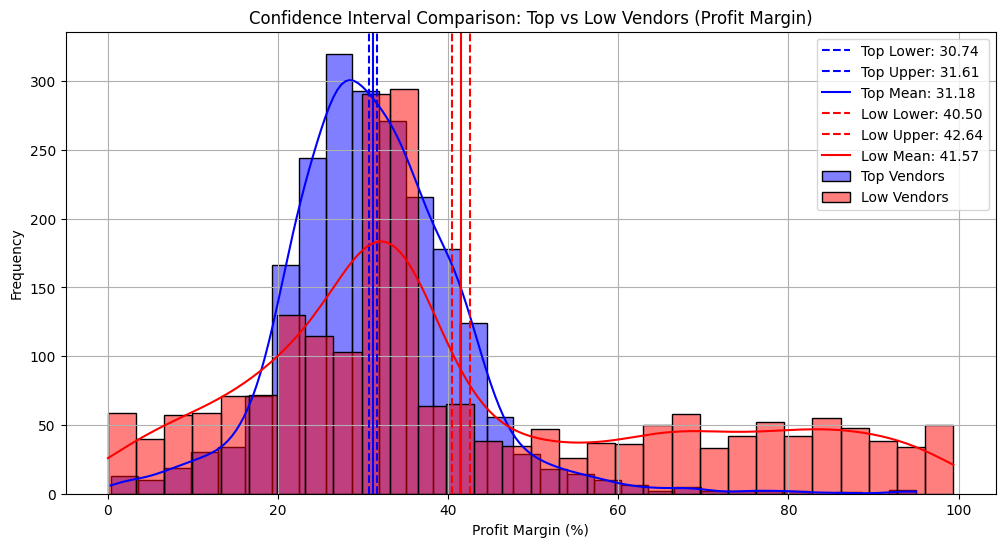

In [44]:
# Calculate CI for Top and Low Vendors
top_mean, top_lower, top_upper = confidence_interval(Top_threshold)
low_mean, low_lower, low_upper = confidence_interval(Low_threshold)


# Print Results
print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")


# Plot
plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(Top_threshold["ProfitMargin"], kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")

plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")


# Low Vendors Plot
sns.histplot(Low_threshold["ProfitMargin"], kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")

plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")


# Labels and Title
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")

plt.legend()
plt.grid(True)

plt.show()


In [ ]:
"""
OutComes
   1.The confidence interval for low-performing vendors (40.50% to 42.64%) is significantly higher 
     than that of top-performing vendors (30.74% to 31.61%).

   2.This indicates that vendors with lower sales tend to maintain higher profit margins, possibly 
     due to premium pricing, niche products, or lower operational expenses.

   3.For High-Performing Vendors: To enhance profitability, they can focus on cost optimization, 
     strategic pricing adjustments, and efficient supply chain management while maintaining their high sales volume.

   4.For Low-Performing Vendors: Although they achieve higher margins, their low sales volume suggests 
     the need to improve marketing strategies, expand customer reach, or adopt competitive pricing to increase overall revenue.
"""

In [45]:
# Is there is significant difference in profit margin between top-performing vendor and low performing vendor?
""" 
 Hypothesis
 H.(Null Hypothesis): There is no significant difference in the mean profit margin of top-perfoming and low-performing vendors.
 H1(Alternative Hypothesis): The mean profit margins of top-perfoming and low-perfoming vendors are significantly different.

 """

In [48]:
Top_threshold=df["TotalSalesDollars"].quantile(0.75)
Low_threshold=df["TotalSalesDollars"].quantile(0.25)
Top_threshold=df.query("TotalSalesDollars>=@Top_threshold")[["ProfitMargin"]].dropna()
Low_threshold=df.query("TotalSalesDollars<=@Lop_threshold")[["ProfitMargin"]].dropna() 


In [46]:
# Two-Sample T-Test: Profit Margin comparison between Top and Low Performing Vendors

import numpy as np
from scipy.stats import ttest_ind

# Step 1: Define Hypothesis
print("Hypothesis Testing: Two-Sample T-Test\n")

print("H0 (Null Hypothesis): There is NO significant difference in mean profit margin between Top and Low performing vendors.")
print("H1 (Alternative Hypothesis): There IS a significant difference in mean profit margin between Top and Low performing vendors.\n")

# Step 2: Create Top and Low Vendor Groups

Top_threshold_value = df["TotalSalesDollars"].quantile(0.75)
Low_threshold_value = df["TotalSalesDollars"].quantile(0.25)

Top_vendors = df.query("TotalSalesDollars >= @Top_threshold_value")["ProfitMargin"].dropna()
Low_vendors = df.query("TotalSalesDollars <= @Low_threshold_value")["ProfitMargin"].dropna()

# Step 3: Perform Two-Sample T-Test

t_stat, p_value = ttest_ind(Top_vendors, Low_vendors, equal_var=False)

# Step 4: Print Test Results

print("Test Results:")
print(f"T-statistic : {t_stat:.4f}")
print(f"P-value     : {p_value:.4f}\n")

# Step 5: Calculate Means

top_mean = Top_vendors.mean()
low_mean = Low_vendors.mean()

print(f"Top Vendors Mean Profit Margin : {top_mean:.2f}%")
print(f"Low Vendors Mean Profit Margin : {low_mean:.2f}%\n")



# Step 6: Conclusion based on p-value

alpha = 0.05

if p_value < alpha:
    print("Decision: Reject the Null Hypothesis (H0)")
    print("Conclusion: There is a statistically significant difference in profit margin between Top and Low performing vendors.\n")
    
    print("Business Insight:")
    print("• Low-performing vendors have significantly higher profit margins compared to Top-performing vendors.")
    print("• Top vendors rely more on high sales volume, while Low vendors rely more on higher margin strategies.")
    print("• This suggests an opportunity for Top vendors to improve profitability through margin optimization.")
else:
    print("Decision: Fail to Reject the Null Hypothesis (H0)")
    print("Conclusion: There is NO statistically significant difference in profit margin between the two groups.")


Hypothesis Testing: Two-Sample T-Test

H0 (Null Hypothesis): There is NO significant difference in mean profit margin between Top and Low performing vendors.
H1 (Alternative Hypothesis): There IS a significant difference in mean profit margin between Top and Low performing vendors.

Test Results:
T-statistic : -17.6695
P-value     : 0.000000

Top Vendors Mean Profit Margin : 31.18%
Low Vendors Mean Profit Margin : 41.57%

Decision: Reject the Null Hypothesis (H0)
Conclusion: There is a statistically significant difference in profit margin between Top and Low performing vendors.

Business Insight:
• Low-performing vendors have significantly higher profit margins compared to Top-performing vendors.
• Top vendors rely more on high sales volume, while Low vendors rely more on higher margin strategies.
• This suggests an opportunity for Top vendors to improve profitability through margin optimization.


In [9]:
"""
Note 
 
 Small p-value → Strong evidence → Reject H₀ → Significant difference is present

Note for aplha values when aplha values increase or decrease.

When Alpha (α) increases (Example: α = 0.10):
 1.Higher chance of making a wrong decision is allowed.
 2.The test becomes less strict.
 3.It becomes easier to reject the Null Hypothesis (H₀).
 4.Even weaker evidence can show significant difference.
 5.Confidence level decreases (e.g., 95% → 90%).
When Alpha (α) decreases (Example: α = 0.01):
 1.Lower chance of making a wrong decision is allowed.
 2.The test becomes more strict.
 3.It becomes harder to reject the Null Hypothesis (H₀).
 4.Stronger evidence is required to show significant difference.
 5.Confidence level increases (e.g., 95% → 99%).

"""

'\nNote \n\n Small p-value → Strong evidence → Reject H₀ → Significant difference is present\n\nNote for aplha values when aplha values increase or decrease.\n\nWhen Alpha (α) increases (Example: α = 0.10):\n 1.Higher chance of making a wrong decision is allowed.\n 2.The test becomes less strict.\n 3.It becomes easier to reject the Null Hypothesis (H₀).\n 4.Even weaker evidence can show significant difference.\n 5.Confidence level decreases (e.g., 95% → 90%).\nWhen Alpha (α) decreases (Example: α = 0.01):\n 1.Lower chance of making a wrong decision is allowed.\n 2.The test becomes more strict.\n 3.It becomes harder to reject the Null Hypothesis (H₀).\n 4.Stronger evidence is required to show significant difference.\n 5.Confidence level increases (e.g., 95% → 99%).\n\n'

C:\Users\asus\AppData\Local\Temp\ipykernel_10444\684851960.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([Top_vendors, Low_vendors], labels=["Top Vendors", "Low Vendors"], patch_artist=True)


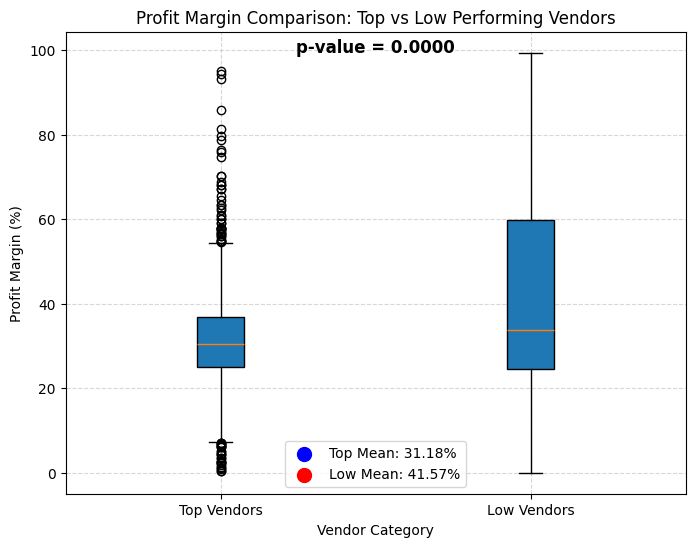

In [47]:

plt.figure(figsize=(8,6))


plt.boxplot([Top_vendors, Low_vendors], labels=["Top Vendors", "Low Vendors"], patch_artist=True)


plt.scatter(1, top_mean, color="blue", s=100, label=f"Top Mean: {top_mean:.2f}%")
plt.scatter(2, low_mean, color="red", s=100, label=f"Low Mean: {low_mean:.2f}%")

plt.title("Profit Margin Comparison: Top vs Low Performing Vendors")
plt.ylabel("Profit Margin (%)")
plt.xlabel("Vendor Category")


plt.text(1.5, max(max(Top_vendors), max(Low_vendors)),
         f"p-value = {p_value:.4f}",
         horizontalalignment='center',
         fontsize=12,
         fontweight='bold')

plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()
